<a href="https://colab.research.google.com/github/l0bus/DatayAnalitics_Proyectos/blob/main/Proyecto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 4 - Data Analitics

# Introduccion
---

## Reto
Se tiene un conjunto de datos simulado basado en seis meses de la información recogida
por una aseguradora mundial llamada “SALUD Y SEGUROS”, cuyo objetivo fue
desarrollar un modelo para determinar la probabilidad de siniestro en los próximos 12
meses.
La variable de interés es la siniestralidad , que representa el estado binario de No Siniestro 0 y Siniestro 1.

---

## Descripcion del Problema
Los modelos analíticos para el manejo de los seguros de accidentes se están usando por
muchas instituciones y están dando resultados exitosos en todo el mundo. Los modelos
analíticos se pueden definir como un conjunto de métodos y técnicas cuantitativas usados
para predecir la probabilidad de que un cliente falle (Sea siniestroso) y en consecuencia no se
recupere el rédito otorgado por la empresa. 
  
---

## Entendimiento de los datos

### Descripción de las Variables

|  Variables | Descripción | Tipo de variable |
| :---  | :--- | :--- |
|Cliente_ID | Identificador de cliente. | Cualitativa politómica nominal|
|Antigüedad_Maxima| Antigüedad del cliente en meses. | Continua|
|Nivel_Ingresos| Nivel de ingresos 0(bajo) a 5(alto).| Cualitativa politómica ordinal|
|Saldo_Pendiente| Saldo pendiente del cliente. | Continua |
|Puntaje_Morosidad| Tasa de morosidad en el seguro 0(bajo) a 5(alto).| Cualitativa politómica ordinal|
|Saldo_Pendiente_Seg| Saldo pendiente de la póliza del seguro.| Continua |
|Siniestros | Número de siniestros en la historia del cliente.| Continua discreta |
|Estado_Siniestro| 0(No siniestro) y 1(Siniestro)| Cualitativa dicotómica nominal|

### Librerias

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import missingno as mno
import statsmodels.api as sm
import scipy as sp
#from statsmodels.graphics.gofplots import qqplot
from scipy.stats import kurtosis
import statistics as stats

In [ ]:
print('\t\t ..:: VERSIONES ::..')
print(f' Numpy: {np.__version__}')
print(f' Pandas: {pd.__version__}')
print(f' Matplotlib: {mpl.__version__}')
print(f' Seaborn: {sns.__version__}')
print(f' Missingno: {mno.__version__}')
print(f' Scikit Learn: {sklearn.__version__}')
print(f' Statsmodels: {sm.__version__}')
print(f' Scipy: {sp.__version__}')

		 ..:: VERSIONES ::..
 Numpy: 1.21.6
 Pandas: 1.3.5
 Matplotlib: 3.2.2
 Seaborn: 0.11.2
 Missingno: 0.5.1
 Scikit Learn: 1.0.2
 Statsmodels: 0.12.2
 Scipy: 1.7.3


### Carga de Datos

In [ ]:
path = '/content/Siniestros.csv'

In [ ]:
raw_data = pd.read_csv(path)

In [ ]:
raw_data.shape

(5800, 18)

In [ ]:
raw_data.head()

,Cliente_ID,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
0,185,44.0,1.0,604.86,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
1,238,79.0,1.0,1006.21,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
2,346,102.0,1.0,299.23,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
3,460,NaN,1.0,645.19,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no
4,549,109.0,NaN,218.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,no


### EDA (Análisis exploratorio de datos)

In [ ]:
(raw_data == 0).mean() * 100

Cliente_ID              0.000000
Antigüedad_Maxima       1.431034
Nivel_Ingresos         33.017241
Saldo_Pendiente         5.706897
Puntaje_Morosidad1     88.931034
Puntaje_Morosidad2     85.189655
Puntaje_Morosidad3     84.741379
Puntaje_Morosidad4     84.241379
Puntaje_Morosidad5     83.275862
Puntaje_Morosidad6     82.482759
Saldo_Pendiente_Seg    91.793103
Siniestros1            82.724138
Siniestros2            84.103448
Siniestros3            84.172414
Siniestros4            85.017241
Siniestros5            85.689655
Siniestros6            86.741379
Estado_Siniestro        0.000000
dtype: float64

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5800 entries, 0 to 5799
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cliente_ID           5800 non-null   int64  
 1   Antigüedad_Maxima    5213 non-null   float64
 2   Nivel_Ingresos       5527 non-null   float64
 3   Saldo_Pendiente      5800 non-null   float64
 4   Puntaje_Morosidad1   5800 non-null   int64  
 5   Puntaje_Morosidad2   5614 non-null   float64
 6   Puntaje_Morosidad3   5544 non-null   float64
 7   Puntaje_Morosidad4   5460 non-null   float64
 8   Puntaje_Morosidad5   5397 non-null   float64
 9   Puntaje_Morosidad6   5324 non-null   float64
 10  Saldo_Pendiente_Seg  5800 non-null   float64
 11  Siniestros1          5800 non-null   int64  
 12  Siniestros2          5800 non-null   int64  
 13  Siniestros3          5800 non-null   int64  
 14  Siniestros4          5800 non-null   int64  
 15  Siniestros5          5800 non-null   i

- Se observará la presencia y el comportamiento de los datos perdidos:

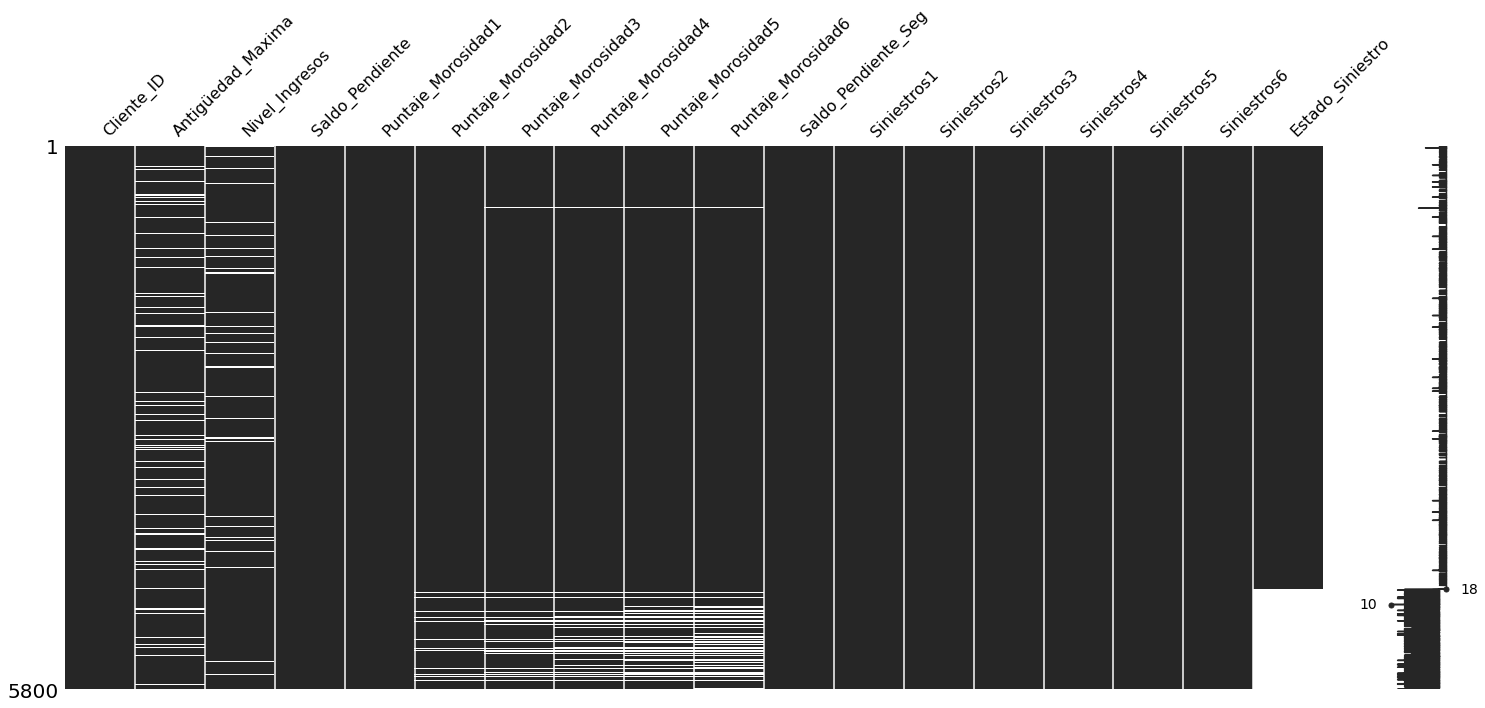

In [ ]:
mno.matrix(raw_data, color=(0.15,0.15,0.15))
plt.show()

- Con la gráfica se aprecia la existencia de valores perdidos y de algunos patrones entre las variables dependientes.
- La variable dependiente tiene valores perdidos. En ese caso, se eliminarán los registros que no cuenten con un valor en la variable objetivo, pues una imputación no sería evidencia real del comportamiento de esta variable.

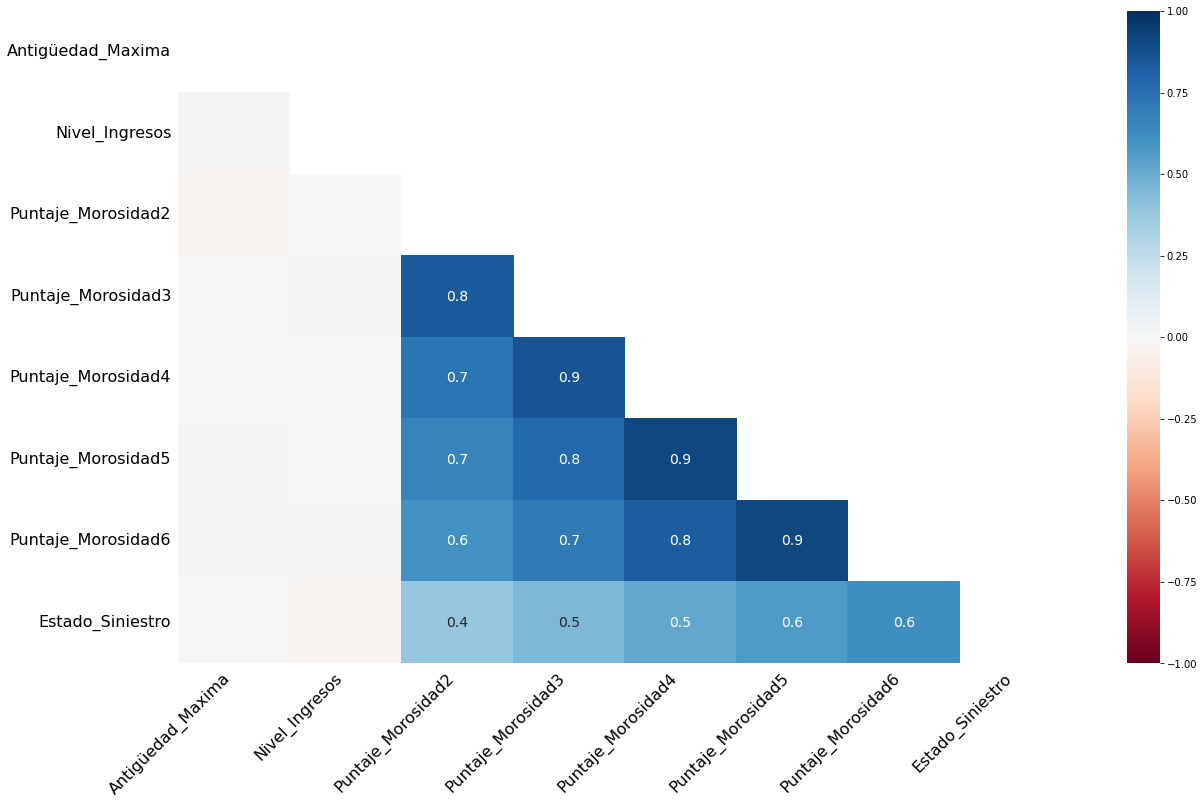

In [ ]:
mno.heatmap(raw_data)
plt.show()

- Principalmente, se observa una fuerte correlación de Pearson entre los valores faltantes de las variables de puntaje de morosidad desde la segunda a la sexta.

In [ ]:
def show_charts_continous(col, title_hist):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    fig.set_size_inches(15,5)
    
    dict_title = {'fontweight':'bold','fontsize':10}
    
    axes[0].set_title(title_hist, fontdict=dict_title)
    axes[1].set_title('Diagrama de violin por estado del siniestro', fontdict=dict_title)
    axes[2].set_title('Boxplot por estado del siniestro', fontdict=dict_title)

    axes[0].set_ylabel(' ')
    axes[0].set_xlabel(' ')

    axes[0].spines['right'].set_visible(False)
    axes[0].spines['left'].set_visible(False)
    axes[0].spines['top'].set_visible(False)

    sns.histplot(x=raw_data[col], bins=20, ax=axes[0], kde=True)
    sns.violinplot(x=raw_data.Estado_Siniestro, y=raw_data[col], linewidth=2.5, ax=axes[1])
    sns.boxplot(x=raw_data.Estado_Siniestro, y=raw_data[col], linewidth=2.5, ax=axes[2])
    
    plt.show()

In [ ]:
dict_title = {'fontweight':'bold','fontsize':10}
def show_cual(col_, title):
    col = str(col_)
    dict_title = {'fontweight':'bold','fontsize':10}

    aux_01 = raw_data[raw_data.Estado_Siniestro=='no']
    aux_02 = raw_data[raw_data.Estado_Siniestro=='si']

    fig, axes = plt.subplots(nrows=2, ncols=2)
    fig.set_size_inches(14,6)

    fig.suptitle(title, fontsize=16)
    
    axes[0,0].set_title('Frecuencia relativa', fontdict=dict_title)
    axes[0,1].set_title('Diagrama de barras por estado de siniestro', fontdict=dict_title)
    axes[1,0].set_title('Freucencia relativa para NO SINIESTROS', fontdict=dict_title)
    axes[1,1].set_title('Freucencia relativa para SINIESTROS', fontdict=dict_title)

    sns.countplot(x=raw_data[col], ax=axes[0,0])
    sns.countplot(y=raw_data[col],hue=raw_data.Estado_Siniestro, ax=axes[0,1])

    sns.countplot(x=aux_01[col], ax=axes[1,0])
    sns.countplot(x=aux_02[col], ax=axes[1,1])

    ndi = 'Nivel de ingresos'

    axes[0,0].set_ylabel('')
    axes[0,0].set_xlabel(ndi)

    axes[0,1].set_ylabel(ndi)
    axes[0,1].set_xlabel('')

    axes[1,0].set_ylabel('')
    axes[1,0].set_xlabel(ndi)

    axes[1,1].set_ylabel('')
    axes[1,1].set_xlabel(ndi)

    plt.tight_layout()
    plt.show()

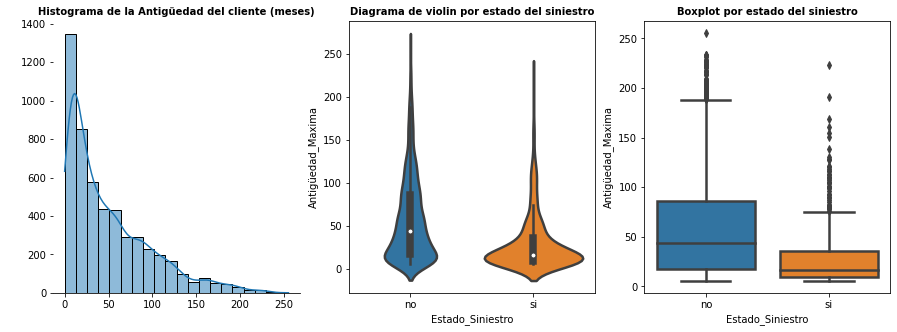

In [ ]:
show_charts_continous('Antigüedad_Maxima','Histograma de la Antigüedad del cliente (meses)')

- Visualmente es apreciable que la Antigüedad del cliente tiene una distribución sesgada a la derecha.
- Visualmente es apreciable que la distribución de la variable es distinta para los casos de siniestro frente a los que no son siniestros.

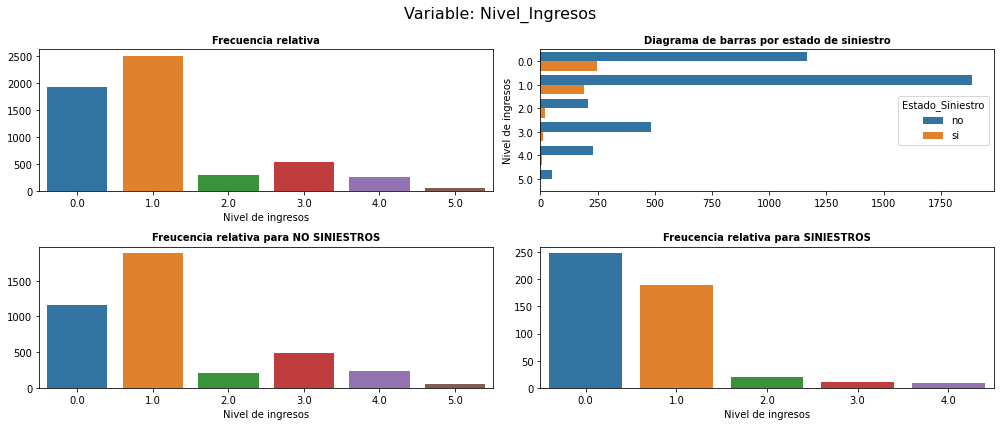

In [ ]:
show_cual('Nivel_Ingresos', 'Variable: Nivel_Ingresos')

- Se aprecia en la variable, en general, que predominan los niveles de ingreso de cero y uno (bajos ingresos). Además, el nivel de ingreso menos común es el cinco (ingresos altos).
- En los casos de siniestro, la distribución de los niveles de ingreso varia, predominando en primer lugar el cero y consecuentemente el uno. De la misma manera, no existen casos de siniestro en los niveles más altos de ingresos.

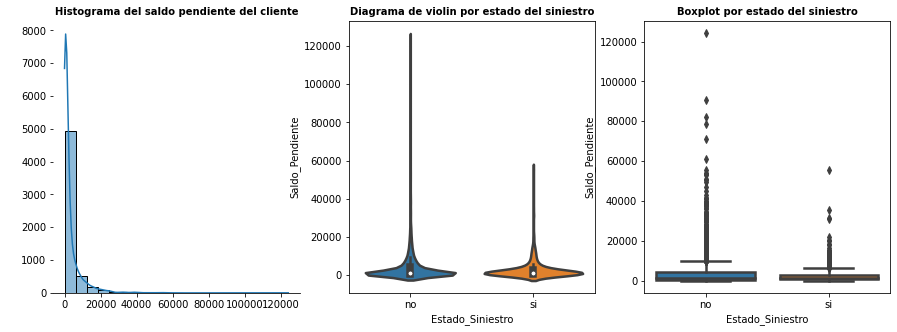

In [ ]:
show_charts_continous('Saldo_Pendiente','Histograma del saldo pendiente del cliente')

- Se observa una distribución sumamente apuntalada y sesgada a la derecha.
- El punto de corte para la discretización de la variable puede ser 15,000.
- Hay una gran presencia de outliers (sobre todo en los casos de no sisniestro).

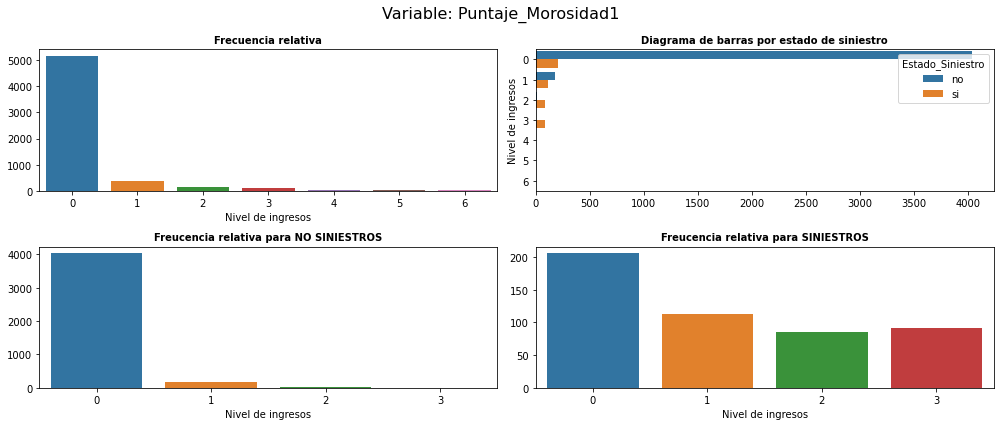

In [ ]:
show_cual('Puntaje_Morosidad1', 'Variable: Puntaje_Morosidad1')

- En este caso, se requirió una transformación de agrupación diferenciado a los clientes por los no morosos en contraste con los que presentan al menos un puntaje superior a cero en la distribución de la variable.

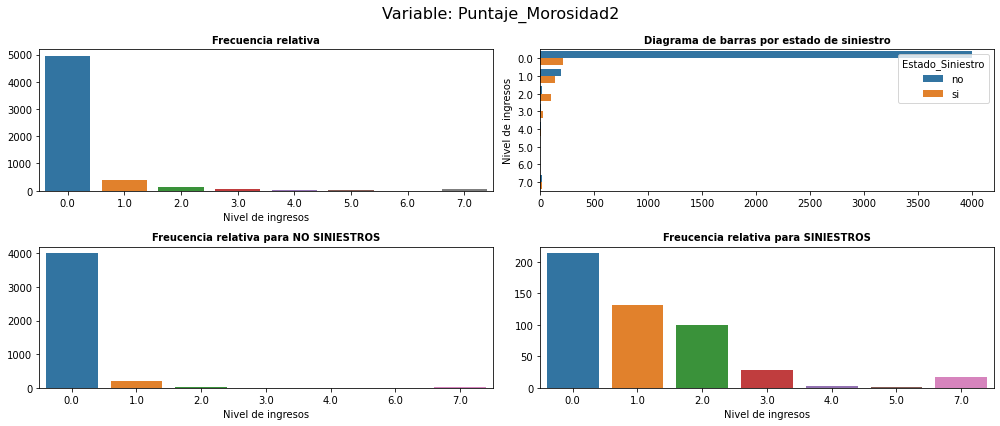

In [ ]:
show_cual('Puntaje_Morosidad2', 'Variable: Puntaje_Morosidad2')

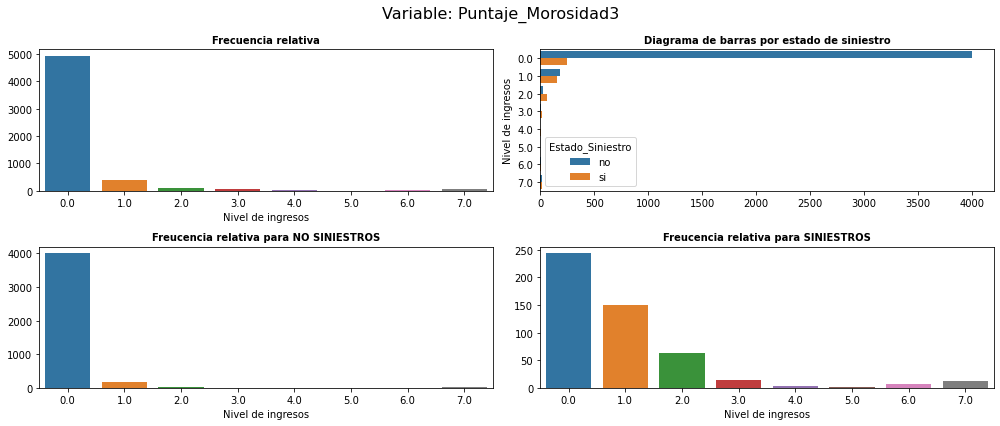

In [ ]:
show_cual('Puntaje_Morosidad3', 'Variable: Puntaje_Morosidad3')

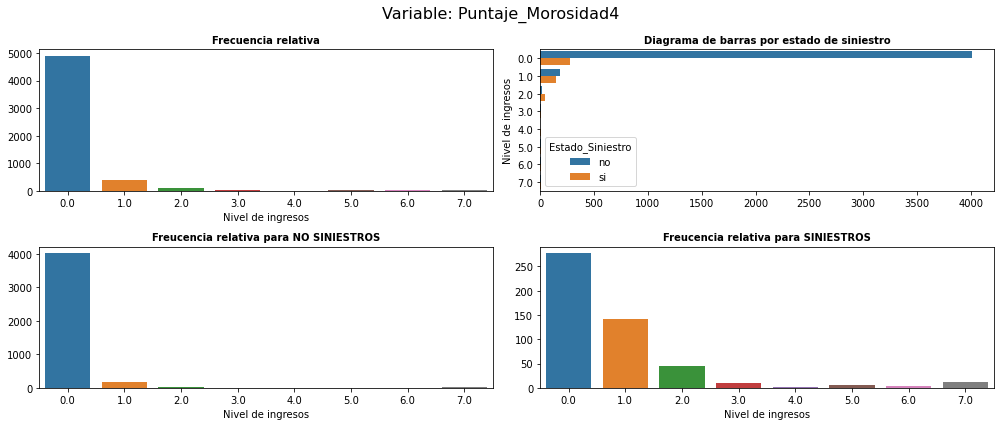

In [ ]:
show_cual('Puntaje_Morosidad4', 'Variable: Puntaje_Morosidad4')

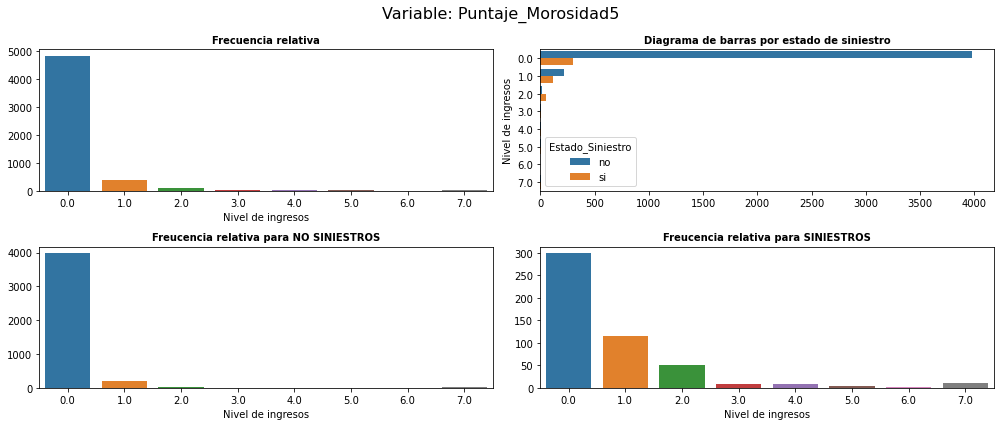

In [ ]:
show_cual('Puntaje_Morosidad5', 'Variable: Puntaje_Morosidad5')

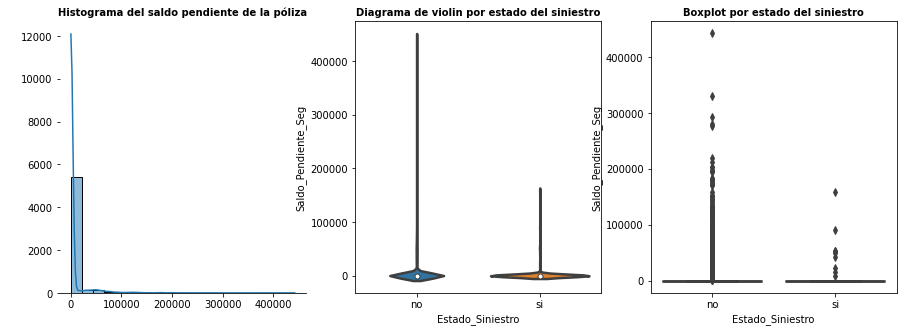

In [ ]:
show_charts_continous('Saldo_Pendiente_Seg','Histograma del saldo pendiente de la póliza')

- Se observa una distribución claramente apuntalada con sesgo a la derecha.
- Es notoria la existencia de muchos valores atípicos tanto en los casos de siniestro como en los no siniestrosos.

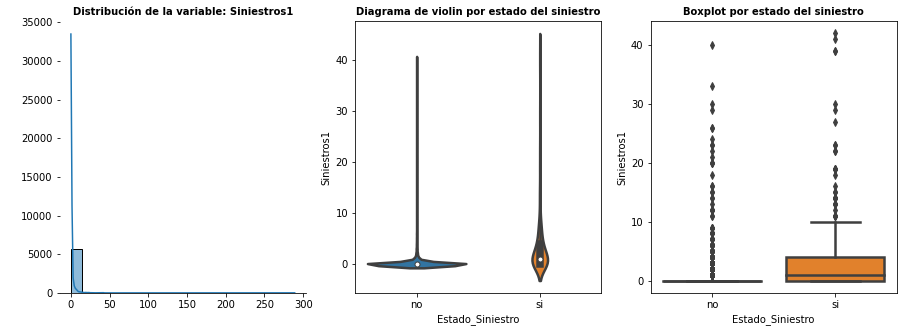

In [ ]:
show_charts_continous('Siniestros1', 'Distribución de la variable: Siniestros1')

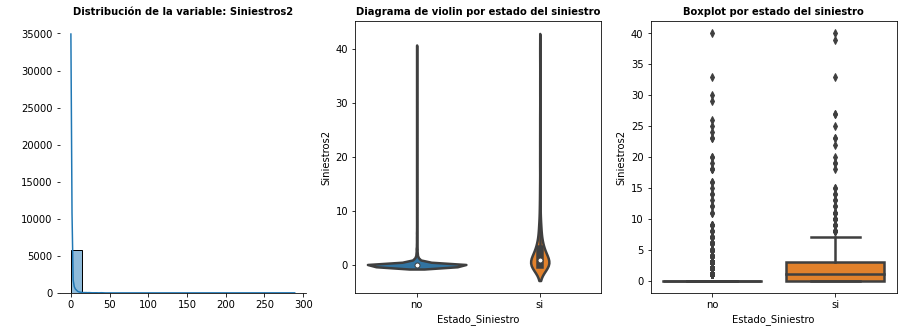

In [ ]:
show_charts_continous('Siniestros2', 'Distribución de la variable: Siniestros2')

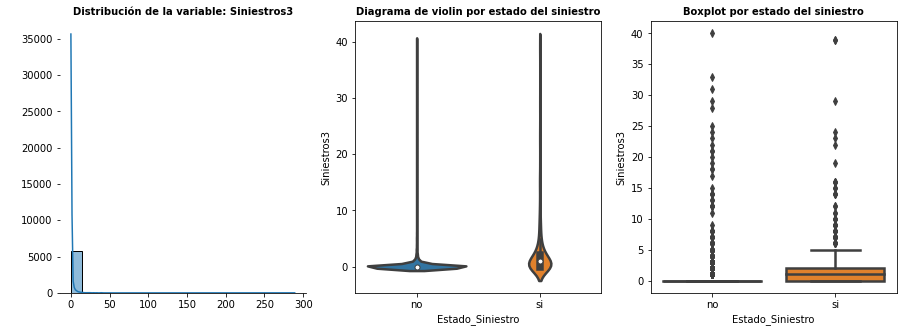

In [ ]:
show_charts_continous('Siniestros3', 'Distribución de la variable: Siniestros3')

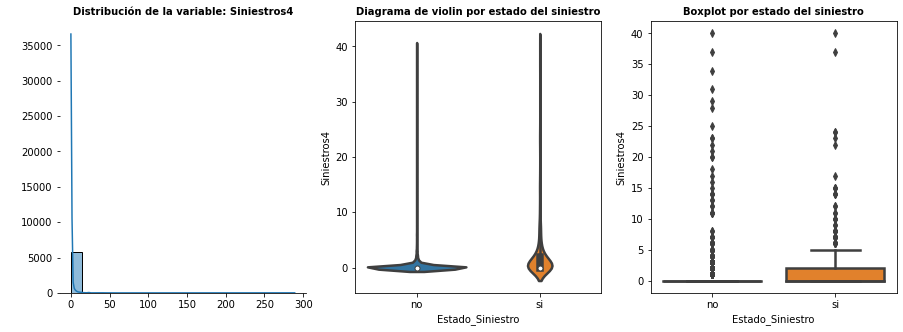

In [ ]:
show_charts_continous('Siniestros4', 'Distribución de la variable: Siniestros4')

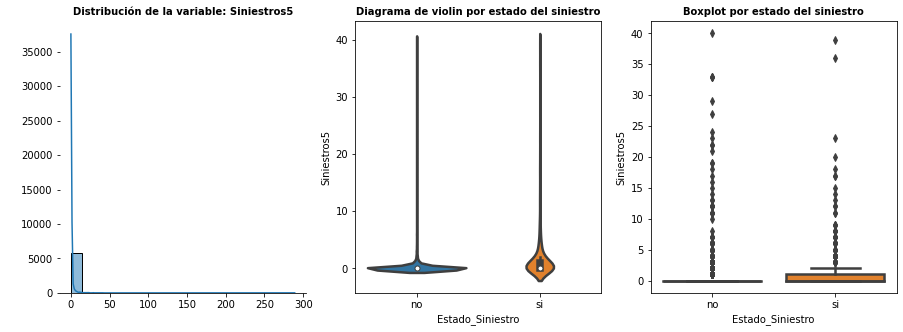

In [ ]:
show_charts_continous('Siniestros5', 'Distribución de la variable: Siniestros5')

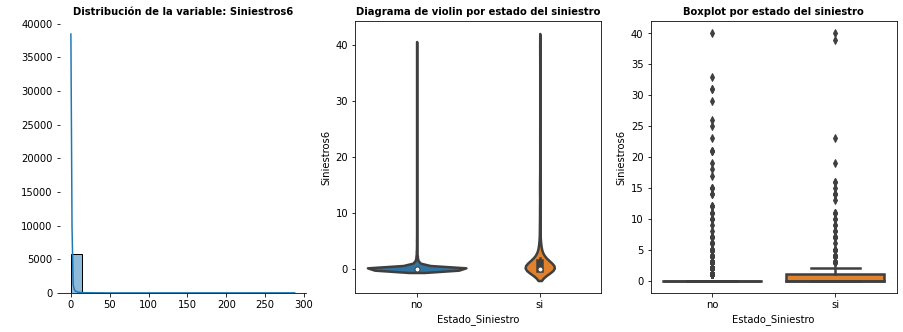

In [ ]:
show_charts_continous('Siniestros6', 'Distribución de la variable: Siniestros6')

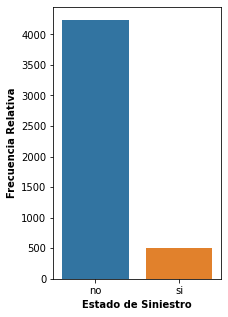

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(3,5)

sns.countplot(x=raw_data.Estado_Siniestro, ax=ax)

ax.set_ylabel('Frecuencia Relativa', fontdict=dict_title)
ax.set_xlabel('Estado de Siniestro', fontdict=dict_title)
plt.show()

In [ ]:
raw_data.describe(percentiles=[.01,.05,0.1,.25,.50,.75,.90,.95,.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
Cliente_ID,5800.0,396733.357414,230285.889850,185.0,7381.98,37000.3,76055.200,195501.2500,403865.000,598317.7500,710902.200,746001.000,782393.3500,790771.00
Antigüedad_Maxima,5213.0,49.847113,47.050525,0.0,0.00,3.0,6.000,12.0000,34.000,76.0000,118.000,149.000,196.0000,255.00
Nivel_Ingresos,5527.0,1.071286,1.158293,0.0,0.00,0.0,0.000,0.0000,1.000,1.0000,3.000,4.000,4.7400,5.00
Saldo_Pendiente,5800.0,3240.983681,6157.722805,0.0,0.00,0.0,21.761,329.7475,1100.315,3265.3225,8786.782,14104.536,27313.9821,124102.08
Puntaje_Morosidad1,5800.0,0.199310,0.679003,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,1.000,3.0000,6.00
Puntaje_Morosidad2,5614.0,0.243498,0.891208,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,2.000,5.8700,7.00
Puntaje_Morosidad3,5544.0,0.220238,0.842461,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,1.000,5.5700,7.00
Puntaje_Morosidad4,5460.0,0.193590,0.781070,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,1.000,5.0000,7.00
Puntaje_Morosidad5,5397.0,0.185473,0.744306,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,1.000,4.0000,7.00
Puntaje_Morosidad6,5324.0,0.172239,0.707314,0.0,0.00,0.0,0.000,0.0000,0.000,0.0000,1.000,1.000,3.0000,7.00


- Es importante aclarar que todas las **distribuciones con alto apuntalamiento** son mejor descritas por una media armónica.
- Frente al claro apuntalamiento de las variables continuas, se calculará la matriz de correlaciones según la Rho de Spearman.

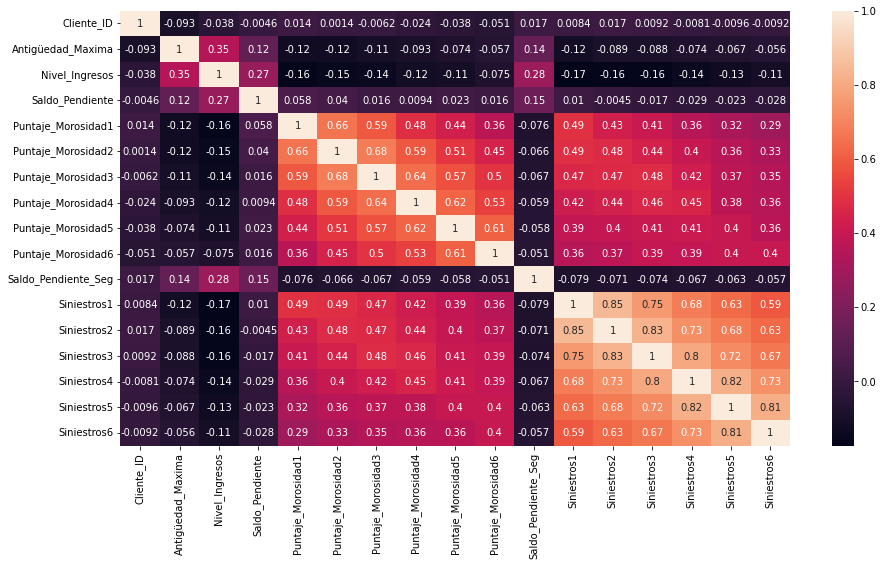

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(15,8)
sns.heatmap(raw_data.corr(method='spearman'), annot=True)
plt.show()

# Preparación de los datos

- Se comenzará por la exclusión de la columna de identificadores:

In [ ]:
raw_data = raw_data.drop('Cliente_ID', axis=1)

## Tratamiento de valores perdidos

- A continuación, se hará una imputación paramétrica de las variables con valores perdidos.

In [ ]:
raw_data.shape

(5800, 17)

In [ ]:
raw_data.isnull().sum()

Antigüedad_Maxima       587
Nivel_Ingresos          273
Saldo_Pendiente           0
Puntaje_Morosidad1        0
Puntaje_Morosidad2      186
Puntaje_Morosidad3      256
Puntaje_Morosidad4      340
Puntaje_Morosidad5      403
Puntaje_Morosidad6      476
Saldo_Pendiente_Seg       0
Siniestros1               0
Siniestros2               0
Siniestros3               0
Siniestros4               0
Siniestros5               0
Siniestros6               0
Estado_Siniestro       1068
dtype: int64

- Antes de imputar los datos, se removerán todas aquellas observaciones donde la variable dependiente **"Estado_Siniestro"** no tenga un valor asignado, pues no contiene evidencia que aporte al modelo de manera positiva.

In [ ]:
data_filtered = raw_data.loc[~raw_data.Estado_Siniestro.isna()]

In [ ]:
data_filtered.isnull().sum()

Antigüedad_Maxima      482
Nivel_Ingresos         231
Saldo_Pendiente          0
Puntaje_Morosidad1       0
Puntaje_Morosidad2       0
Puntaje_Morosidad3       1
Puntaje_Morosidad4       3
Puntaje_Morosidad5       4
Puntaje_Morosidad6       4
Saldo_Pendiente_Seg      0
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
Estado_Siniestro         0
dtype: int64

In [ ]:
data_filtered.shape

(4732, 17)

- Una vez filtrados los datos, se procede a hacer las imputaciones respectivas.

In [ ]:
data_imputed = data_filtered.copy()

---

***Para la variable de Antigüedad Máxima:***

In [ ]:
# Primero verifico su apuntalamiento
curtosis =  kurtosis(data_imputed.Antigüedad_Maxima, fisher=True, nan_policy='omit')

if curtosis >0:
  print('Es Leptocúrtica-->', round(curtosis,2 ))
elif curtosis ==0: # 0.03
  print('Es Mesocúrtica-->', round(curtosis,2 ))
else:
  print('Es Platicúrtica-->', round(curtosis,2 ))

Es Leptocúrtica--> 0.97


In [ ]:
# Calculo la mediana y la media armónica para comprobar cula describe mejor la distribución
aux = data_imputed[~data_imputed.Antigüedad_Maxima.isna()][['Antigüedad_Maxima']]
am_median = stats.median(aux.Antigüedad_Maxima)
am_arm_mean = stats.harmonic_mean(aux.Antigüedad_Maxima)
print(f' Mediana: {round(am_median, 2)}')
print(f' Media armónica: {round(am_arm_mean, 2)}')

 Mediana: 41.0
 Media armónica: 22.83


- En este caso, la distribución se encuentra más centrada hacia el valor de la mediana, así que se imputará paramétricamente con ese valor.

In [ ]:
data_imputed['Antigüedad_Maxima'] = data_imputed['Antigüedad_Maxima'].fillna(am_median)

In [ ]:
data_imputed[['Antigüedad_Maxima']].isnull().sum()

Antigüedad_Maxima    0
dtype: int64

In [ ]:
data_imputed.isnull().sum()

Antigüedad_Maxima        0
Nivel_Ingresos         231
Saldo_Pendiente          0
Puntaje_Morosidad1       0
Puntaje_Morosidad2       0
Puntaje_Morosidad3       1
Puntaje_Morosidad4       3
Puntaje_Morosidad5       4
Puntaje_Morosidad6       4
Saldo_Pendiente_Seg      0
Siniestros1              0
Siniestros2              0
Siniestros3              0
Siniestros4              0
Siniestros5              0
Siniestros6              0
Estado_Siniestro         0
dtype: int64

---

***Para la variable de Nivel de Ingresos:***

- Debido a la naturaleza de la variable, se miputará con la moda.

In [ ]:
# Calculo la moda
aux = data_imputed[~data_imputed.Nivel_Ingresos.isna()][['Nivel_Ingresos']]

ni_mode = stats.mode(aux['Nivel_Ingresos'])
print(f' La moda es: {round(ni_mode, 2)}')

 La moda es: 1.0


In [ ]:
data_imputed['Nivel_Ingresos'] = data_imputed['Nivel_Ingresos'].fillna(ni_mode)

In [ ]:
data_imputed[['Nivel_Ingresos']].isnull().sum()

Nivel_Ingresos    0
dtype: int64

---

In [ ]:
data_imputed.isnull().mean()

Antigüedad_Maxima      0.000000
Nivel_Ingresos         0.000000
Saldo_Pendiente        0.000000
Puntaje_Morosidad1     0.000000
Puntaje_Morosidad2     0.000000
Puntaje_Morosidad3     0.000211
Puntaje_Morosidad4     0.000634
Puntaje_Morosidad5     0.000845
Puntaje_Morosidad6     0.000845
Saldo_Pendiente_Seg    0.000000
Siniestros1            0.000000
Siniestros2            0.000000
Siniestros3            0.000000
Siniestros4            0.000000
Siniestros5            0.000000
Siniestros6            0.000000
Estado_Siniestro       0.000000
dtype: float64

- En vista de que quedan muy pocas observaciones con valores perdidos, con fines prácticos, serán removidas del conjunto de datos.

In [ ]:
data_imputed = data_imputed.dropna(axis=0)

In [ ]:
data_imputed.isnull().sum()

Antigüedad_Maxima      0
Nivel_Ingresos         0
Saldo_Pendiente        0
Puntaje_Morosidad1     0
Puntaje_Morosidad2     0
Puntaje_Morosidad3     0
Puntaje_Morosidad4     0
Puntaje_Morosidad5     0
Puntaje_Morosidad6     0
Saldo_Pendiente_Seg    0
Siniestros1            0
Siniestros2            0
Siniestros3            0
Siniestros4            0
Siniestros5            0
Siniestros6            0
Estado_Siniestro       0
dtype: int64

In [ ]:
data_imputed.shape

(4727, 17)

In [ ]:
data_outliers = data_imputed.copy()

## Tratamiento de valores atípicos

In [ ]:
def dist_out(title, col, n):
    c=''
    if n==1:
        c = '#1982c4'
    elif n==2:
        c = '#8ac926'
    ind_title = {'fontweight':'bold','fontsize':16}
    fig, ax = plt.subplots(nrows=1, ncols=1)
    fig.set_size_inches(15,5)
    ax.set_title(str(title), fontdict=ind_title)
    ax.set_ylabel('Frecuencia Relativa')
    ax.set_xlabel('')
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    sns.histplot(x=data_outliers[str(col)], bins=30, ax=ax, kde=True,color=c)
    plt.show()

---  
***Para la variable de Antigüedad Máxima:***

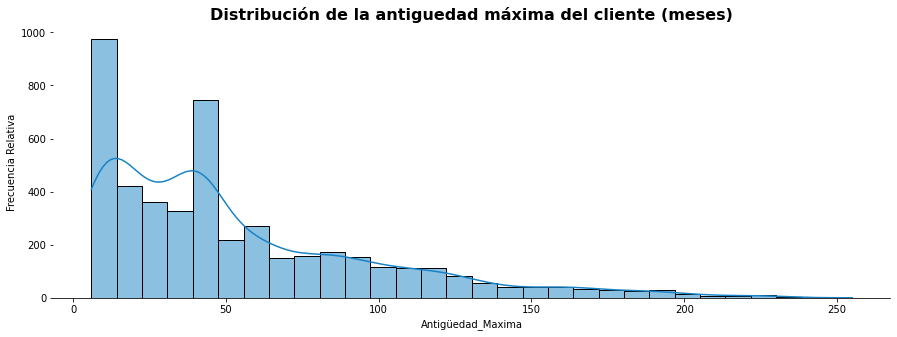

In [ ]:
dist_out('Distribución de la antiguedad máxima del cliente (meses)', 'Antigüedad_Maxima', 1)

- Se observa poca evidencia estadística en los valores más altos de la distribución.
- Se optará por definir un valor máximo de 180 meses, para después, discretizar la variable en rangos de 60 meses cada uno.

In [ ]:
data_outliers['Antigüedad_Maxima'] = np.where(data_outliers['Antigüedad_Maxima'] > 180, 180, data_outliers['Antigüedad_Maxima'])

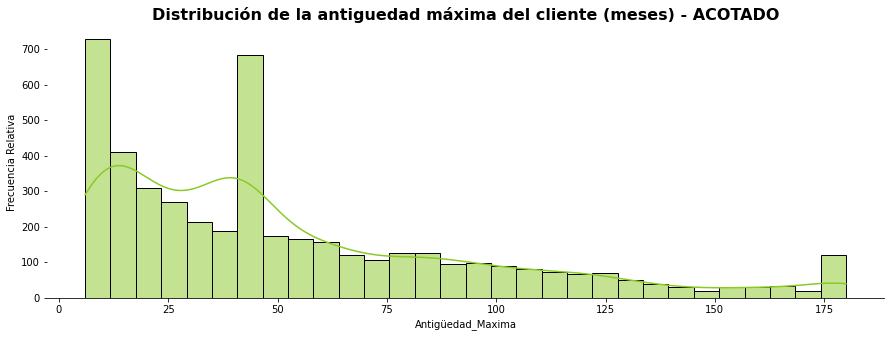

In [ ]:
dist_out('Distribución de la antiguedad máxima del cliente (meses) - ACOTADO', 'Antigüedad_Maxima', 2)

---  
***Para la variable de Saldo Pendiente:***

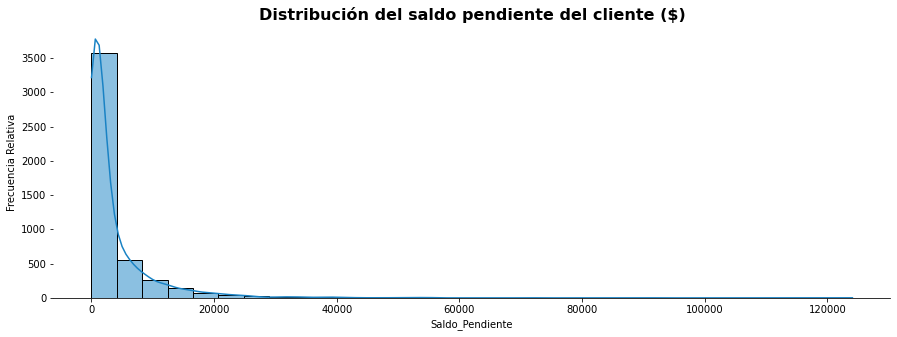

In [ ]:
dist_out('Distribución del saldo pendiente del cliente ($)', 'Saldo_Pendiente', 1)

- Visualmente, se aprecia una ausencia de evidencia para los valores superiores a 20,000 dólares.
- El punto de corte para la discretización se diferenciará con los valores dentro del pico más alto de la distribución.

In [ ]:
data_outliers['Saldo_Pendiente'] = np.where(data_outliers['Saldo_Pendiente'] > 20_000, 20_000, data_outliers['Saldo_Pendiente'])

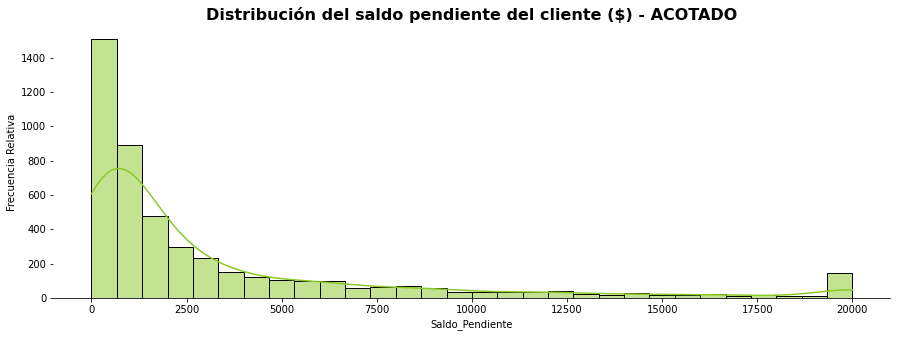

In [ ]:
dist_out('Distribución del saldo pendiente del cliente ($) - ACOTADO', 'Saldo_Pendiente', 2)

---  
***Para la variable de Saldo Pendiente de la póliza del Seguro:***

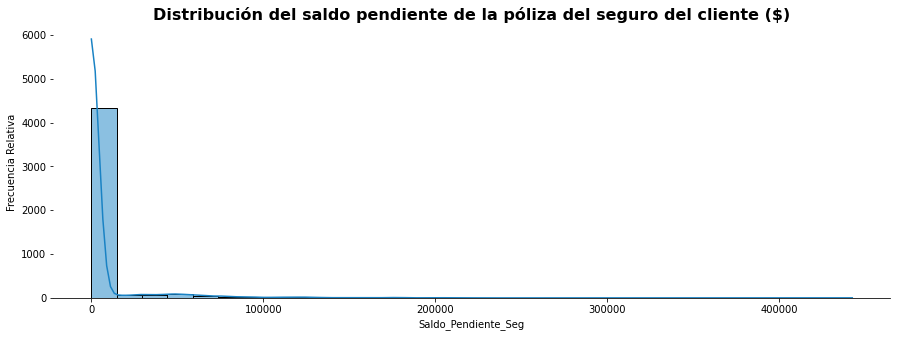

In [ ]:
dist_out('Distribución del saldo pendiente de la póliza del seguro del cliente ($)', 'Saldo_Pendiente_Seg', 1)

- Se observa una clara concentración de los datos entorno al intervalo de 0 a 20,000 dólares.

In [ ]:
data_outliers['Saldo_Pendiente_Seg'] = np.where(data_outliers['Saldo_Pendiente_Seg'] > 100_000, 100_000, data_outliers['Saldo_Pendiente_Seg'])

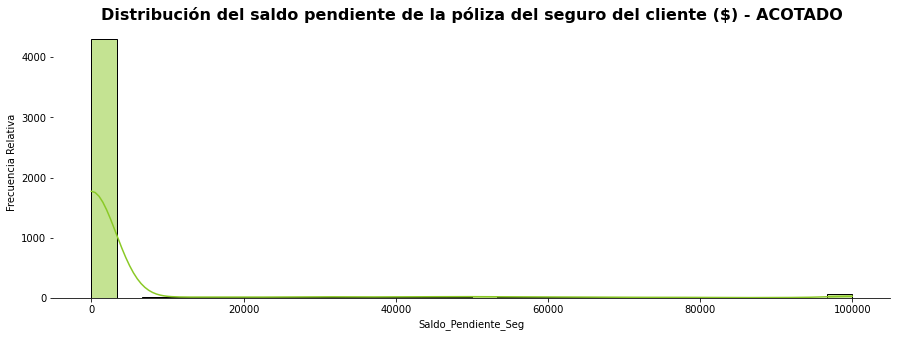

In [ ]:
dist_out('Distribución del saldo pendiente de la póliza del seguro del cliente ($) - ACOTADO', 'Saldo_Pendiente_Seg', 2)

- Del histograma de la variable acotada, se desprende que, la distribución aún está completamente concentrada en torno a cero.
- Revisando el área de estadística descriptiva, se observa que, esta variable cuenta con un aproximado de 92% de valores iguales a cero, por lo que, ya no será acotada nuevamente y el método para su discretización será en base a si su valor es o no equivalente a cero.

In [ ]:
trans_data = data_outliers.copy()

---
## Discretización y formateo de Variables

---
**Discretizado de variables:**

In [ ]:
trans_data.shape

(4727, 17)

In [ ]:
trans_data.sample(4)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
1726,108.0,3.0,1434.41,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
3981,130.0,0.0,1030.59,0,0.0,0.0,0.0,0.0,0.0,0.00,0,0,0,0,0,0,no
578,46.0,1.0,4087.86,0,0.0,0.0,0.0,0.0,0.0,0.00,1,1,1,1,1,1,no
4436,41.0,1.0,243.76,0,0.0,0.0,0.0,0.0,0.0,75616.24,0,0,0,0,0,0,no


In [ ]:
# Discretización de Antigüedad_Maxima
def dis_ant_max(value):
    msg = ''
    if 0 < value < 60:
        msg = 'entre_0_60'
    elif 60 <= value < 120:
        msg = 'entre_60_120'
    elif 120 <= value <=180:
        msg = 'entre_120_180'
    return str(msg)

trans_data['Antigüedad_Maxima'] = trans_data.apply(lambda x: dis_ant_max(x.Antigüedad_Maxima),axis=1)

In [ ]:
# Discretización de Nivel_Ingresos
trans_data['Nivel_Ingresos'] = trans_data.apply(lambda x: int(x.Nivel_Ingresos),axis=1)

In [ ]:
# Discretización de Saldo_Pendiente
def dis_sal_pen(value):
    msg = ''
    if 0 <= value < 5000:
        #msg = 'menor_2500'
        msg = 'menor_5000'
    elif 5000 <= value < 10_000:
        msg = 'menor_10000'
    elif 10_000 <= value < 15_000:
        msg = 'mayor_15000'
    elif 15_000 <= value < 20_000:
        msg = 'mayor_20000'
    return str(msg)  # intervalos de 5000 → 0.000

trans_data['Saldo_Pendiente'] = trans_data.apply(lambda x: dis_sal_pen(x.Saldo_Pendiente),axis=1)

In [ ]:
# Discretización de Puntaje_Morosidad1
def fn_pm1(v):
    t = -1
    if v == 0:
        t = 0
    elif v > 0:
        t = 1
    return int(t) # diferenciación por clase baja o promedio: 0.000
        
trans_data['Puntaje_Morosidad1'] = trans_data.apply(lambda x: fn_pm1(x.Puntaje_Morosidad1),axis=1)

In [ ]:
# Discretización de Morosidad_n
for i in range(2,7,1):
    col = 'Puntaje_Morosidad' + str(i)
    trans_data[col] = trans_data.apply(lambda x: int(x[col]),axis=1)

In [ ]:
# Discretización de Saldo_Pendiente_Seg
def dis_sal_pen_seg(value):
    msg = ''
    if value == 0:
        msg = 'zero'
    elif value != 0:
        msg = 'no_zero'
    return str(msg)

trans_data['Saldo_Pendiente_Seg'] = trans_data.apply(lambda x: dis_sal_pen_seg(x.Saldo_Pendiente_Seg),axis=1)

In [ ]:
# Discretización de Siniestros_n
def dis_sins(value):
    msg = ''
    if value < 3:
        msg = 'poco frecuente'
    elif value >= 3:
        msg = 'muy frecuente'
    return str(msg)

for i in range(1,7,1):
    col = 'Siniestros' + str(i)
    trans_data[col] = trans_data.apply(lambda x: dis_sins(x[col]),axis=1)

In [ ]:
df = trans_data.copy()

---
**Formateo de variables:**

In [ ]:
df.sample(3)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
2165,entre_0_60,0,menor_5000,0,0,0,0,0,0,zero,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,no
461,entre_0_60,1,menor_5000,0,0,0,0,0,0,zero,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,no
1601,entre_0_60,0,menor_5000,0,0,0,0,0,0,zero,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,poco frecuente,no


In [ ]:
# Antigüedad_Maxima
# Variable categórica Ordinal, por ello la transformación debida
def fn_aux_01(msg):
    value = -1
    if msg == 'entre_0_60':
        value = 1
    elif msg == 'entre_60_120':
        value = 2
    elif msg == 'entre_120_180':
        value = 3
    return int(value)

df['Antigüedad_Maxima'] = df.apply(lambda x: fn_aux_01(x.Antigüedad_Maxima),axis=1)

In [ ]:
# Saldo_Pendiente
# Variable categórica Ordinal, por ello la transformación debida
def fn_aux_02(msg):
    value = -1
    if msg == 'menor_5000': 
        value = 1
    elif msg == 'menor_10000':
        value = 2
    elif msg == 'menor_15000':
        value = 3
    elif msg == 'menor_20000':
        value = 4
    return int(value) # intervalos de 5000 → 0.000

df['Saldo_Pendiente'] = df.apply(lambda x: fn_aux_02(x.Saldo_Pendiente),axis=1)

In [ ]:
# Saldo_Pendiente_Seg
# Variable categórica nominal dicotómica
def fn_aux_03(msg):
    value = -1
    if msg == 'zero':
        value = 0
    elif msg == 'no_zero':
        value = 1
    return int(value)

df['Saldo_Pendiente_Seg'] = df.apply(lambda x: fn_aux_03(x.Saldo_Pendiente_Seg),axis=1)

In [ ]:
# Siniestros n
# Variable categórica nominal dicotómica
def fn_aux_04(msg):
    value = -1
    if msg == 'poco frecuente':
        value = 0
    elif msg == 'muy frecuente':
        value = 1
    return int(value)

for i in range(1,7,1):
    col = 'Siniestros' + str(i)
    df[col] = df.apply(lambda x: fn_aux_04(x[col]),axis=1)

In [ ]:
# Estado_Siniestro
# Variable DEPENDIENTE categórica nominal dicotómica
def fn_aux_05(msg):
    value = -1
    if msg == 'si':
        value = 1
    elif msg == 'no':
        value = 0
    return int(value)

df['Estado_Siniestro'] = df.apply(lambda x: fn_aux_05(x.Estado_Siniestro),axis=1)

In [ ]:
df.sample(5)

,Antigüedad_Maxima,Nivel_Ingresos,Saldo_Pendiente,Puntaje_Morosidad1,Puntaje_Morosidad2,Puntaje_Morosidad3,Puntaje_Morosidad4,Puntaje_Morosidad5,Puntaje_Morosidad6,Saldo_Pendiente_Seg,Siniestros1,Siniestros2,Siniestros3,Siniestros4,Siniestros5,Siniestros6,Estado_Siniestro
4004,2,1,1,1,2,2,2,1,1,0,1,1,0,0,0,0,1
3712,1,3,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3720,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2568,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3584,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(4727, 17)

- En este punto, ya se discretizaron todas las variables y se les dió el formato adeucado para el modelo.
- Además, se verificó que no se hayan perdido observaciones en el proceso.

# Modelado

---
**Partición del conjunto de datos:**

In [ ]:
df.Estado_Siniestro.value_counts(normalize=False)

0    4232
1     495
Name: Estado_Siniestro, dtype: int64

In [ ]:
df.Estado_Siniestro.value_counts(normalize=True)

0    0.895282
1    0.104718
Name: Estado_Siniestro, dtype: float64

- Existe un claro desbalanceo entre las clases del conjunto de datos. Por lo que, se hará una partición estratificada de datos con respecto a la variable dependiente y se establecerá como punto de decisión o umbral a la relación de la cantidad de observaciones por clase (0.895)

In [ ]:
X = df.drop('Estado_Siniestro', axis=1)
y = df.Estado_Siniestro

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.33,
                                                    random_state=7,
                                                    stratify=df.Estado_Siniestro)

In [ ]:
X_train.shape, X_test.shape

((3167, 16), (1560, 16))

In [ ]:
print(f'Conjunto de entrenamiento:\n{y_train.value_counts(normalize=True)} \n')
print(f'Conjunto de test:\n{y_test.value_counts(normalize=True)} \n')

Conjunto de entrenamiento:
0    0.895169
1    0.104831
Name: Estado_Siniestro, dtype: float64 

Conjunto de test:
0    0.895513
1    0.104487
Name: Estado_Siniestro, dtype: float64 



---
**Análisis estadístico para selección de varaibles:**

In [ ]:
modelo = sm.Logit(endog=y, exog=X)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.217292
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       Estado_Siniestro   No. Observations:                 4727
Model:                          Logit   Df Residuals:                     4711
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.3520
Time:                        12:56:45   Log-Likelihood:                -1027.1
converged:                       True   LL-Null:                       -1585.1
Covariance Type:            nonrobust   LLR p-value:                1.867e-228
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Antigüedad_Maxima      -1.8151      0.106    -17.112      0.000      -2.023      -1.607
Ni

In [ ]:
li_cols = ['Antigüedad_Maxima',
           'Nivel_Ingresos',
           'Saldo_Pendiente_Seg',
           'Puntaje_Morosidad2',
           'Puntaje_Morosidad1',
           'Saldo_Pendiente',
           'Siniestros1']

In [ ]:
X = X[ li_cols ]

In [ ]:
X.columns

Index(['Antigüedad_Maxima', 'Nivel_Ingresos', 'Saldo_Pendiente_Seg',
       'Puntaje_Morosidad2', 'Puntaje_Morosidad1', 'Saldo_Pendiente',
       'Siniestros1'],
      dtype='object')

---
**Desarrollo del modelo:**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=7)

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=7)

In [ ]:
y_train_pred = lr.predict(X_train)

- Conjunto de entrenamiento:

In [ ]:
y_train_pred_probs_g = lr.predict_proba(X_train)[:, 1]

In [ ]:
y_train_pred_fix =  (lr.predict_proba(X_train)[:,1]>=0.07).astype(int)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm_train = confusion_matrix(y_train, y_train_pred_fix)
cm_train

array([[2562,  273],
       [  93,  239]], dtype=int64)

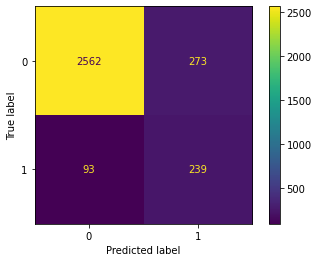

In [ ]:
display_cm_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,
                                          display_labels=lr.classes_)
display_cm_train.plot()
plt.show()

In [ ]:
print(classification_report(y_train, y_train_pred_fix, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93      2835
           1       0.47      0.72      0.57       332

    accuracy                           0.88      3167
   macro avg       0.72      0.81      0.75      3167
weighted avg       0.91      0.88      0.89      3167



In [ ]:
df_train = pd.DataFrame()

In [ ]:
df_train['siniestro'] = y_train.reset_index(drop=True)

In [ ]:
y_train_pred_probs_g = list(y_train_pred_probs_g)

In [ ]:
df_train['probs'] = y_train_pred_probs_g

In [ ]:
df_train

,siniestro,probs
0,0,0.067672
1,0,0.035878
2,0,0.051290
3,0,0.067672
4,0,0.051290
...,...,...
3162,0,0.019423
3163,0,0.034471
3164,0,0.051290
3165,1,0.235224


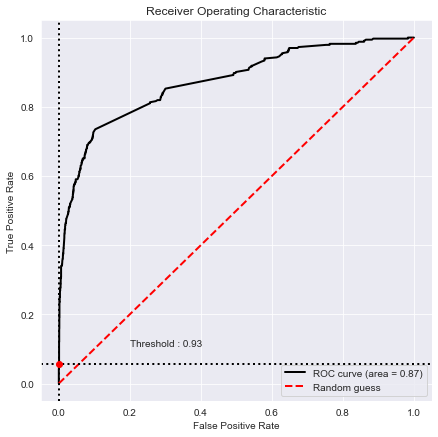

In [ ]:
from plot_metric.functions import BinaryClassification

bc = BinaryClassification(df_train["siniestro"], df_train["probs"], labels=["Class 1", "Class 2"], threshold=0.93)

plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

- Conjunto de test:

In [ ]:
y_test_pred_probs_g = lr.predict_proba(X_test)[:, 1]

In [ ]:
y_test_pred_fix =  (lr.predict_proba(X_test)[:,1]>=0.07).astype(int)

In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred_fix)
cm_test

array([[1266,  131],
       [  43,  120]], dtype=int64)

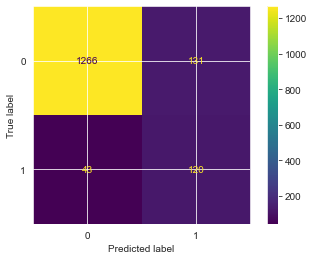

In [ ]:
display_cm_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,
                                          display_labels=lr.classes_)
display_cm_test.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_test_pred_fix, target_names=['0', '1']))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1397
           1       0.48      0.74      0.58       163

    accuracy                           0.89      1560
   macro avg       0.72      0.82      0.76      1560
weighted avg       0.92      0.89      0.90      1560



In [ ]:
df_test = pd.DataFrame()

In [ ]:
df_test['siniestro'] = y_test.reset_index(drop=True)

In [ ]:
y_test_pred_probs_g = list(y_test_pred_probs_g)

In [ ]:
df_test['probs'] = y_test_pred_probs_g

In [ ]:
df_test

,siniestro,probs
0,1,0.872179
1,0,0.051290
2,0,0.569227
3,0,0.045470
4,0,0.026970
...,...,...
1555,0,0.032931
1556,0,0.094992
1557,0,0.067672
1558,0,0.026970


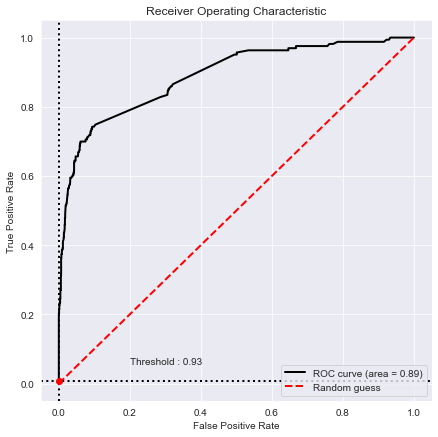

In [ ]:
bc = BinaryClassification(df_test["siniestro"], df_test["probs"], labels=["Class 1", "Class 2"], threshold=0.93)

plt.figure(figsize=(7,7))
bc.plot_roc_curve()
plt.show()

# Conclusiones

- Se construyó un modelo paramétrico de Regresión Logística con un umbral de 0.93 que tiene un accuracy de 89% sobre el total de datos y además, predice correctamente el 74% de los casos de interés (clientes siniestrosos).
- El desbalanceo de observaciones por clase es ajustable en el modelo de acuerdo a la proporción de la clase mayoritaria sobre el total de observaciones.
- Es importante recalcar que, teóricamente el umbral tendría que haber sido 0.895, pero con la iteración y revisión constante sobre el proceso de desarrollo, se observó que un umbral un poco más permisivo discriminaba de mejor manera a los datos.
- Si bien es cierto, el umbral del modelo ha sido flexible en cuanto a la discriminación, no se recomienda hacerlo más permisibo porque la métrica de recall cae significativamente en cuanto a ambas clases (sobre todo en los clientes no siniestrosos).